# 공공데이터 과제 #1
#### 1. 시작 연도부터 끝나는 연도년까지 대구 기온 데이터에서 특정 월의 최고 기온 및 최저 기온의 평균값을 구하고 그래프로 표현 하시오.

In [2]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

# 한글 글꼴
import platform
import matplotlib.font_manager as fm

system_name=platform.system()
if system_name=='Windows':         # Windows 운영체제
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name=='Darwin':       # Mac OS
    print('Mac OS')
    plt.rc('font',family='AppleGothic')
elif system_name=='Linux':        # Linux
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'  # => 폰트경로설정
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font',family=font_name)
else:
    print("Not support")

# 파일 불러오기
weather_df=pd.read_csv('./daegu_utf8.csv',encoding='utf-8')

# '날짜'컬럼 datetime으로 변환
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
print(weather_df['날짜'].dtype)

Windows OS
datetime64[ns]


In [3]:
# 연/월 입력받기
start_year=int(input('시작 연도를 입력하세요.'))
end_year=int(input('마지막 연도를 입력하세요.'))
month=int(input('기온 변화를 측정할 달을 입력하세요.'))

# 필요한 연/월 추출
year_df= weather_df[(weather_df['날짜'].dt.year>=start_year)&(weather_df['날짜'].dt.year<=end_year)]
month_df=year_df[year_df['날짜'].dt.month==month]


In [4]:
# 연도별 그룹화
year_group=month_df.groupby(month_df['날짜'].dt.year)
year_group.mean()

,지점,평균기온,최저기온,최고기온
날짜,,,,
2015,143.0,2.261290,-1.722581,6.812903
2016,143.0,-0.174194,-4.219355,4.329032
2017,143.0,1.080645,-3.677419,6.345161
2018,143.0,-0.929032,-5.170968,4.009677
2019,143.0,1.732258,-3.461290,7.322581


In [5]:
# 연도별 평균기온 리스트
max_list=[]
min_list=[]
for i in year_group.mean()['최고기온'].values:
    max_list+=[round(i,1)]
for i in year_group.mean()['최저기온'].values:
    min_list+=[round(i,1)]


2015년부터 2019년까지 1월의 기온 변화

1월 최저기온 평균 :
-1.7, -4.2, -3.7, -5.2, -3.5
1월 최고기온 평균 :
6.8, 4.3, 6.3, 4.0, 7.3


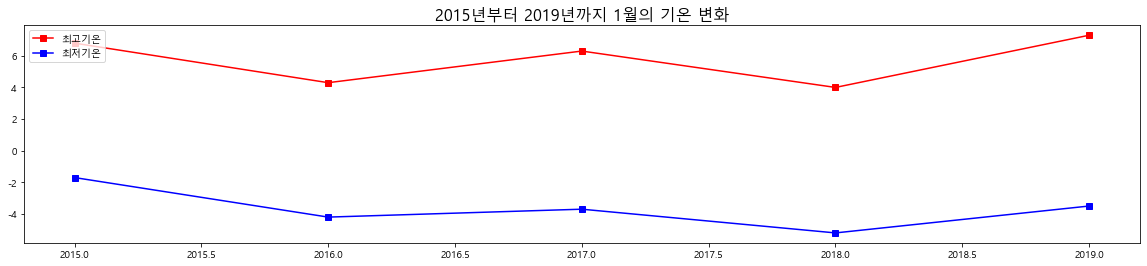

In [6]:
# x축 리스트
x_year=[]
for i in range(start_year,end_year+1):
    x_year+=[i]

# 그래프 그리기
plt.figure(figsize=(20, 4))
plt.plot(x_year,max_list, 'r', marker='s', label='최고기온')
plt.plot(x_year,min_list, 'b', marker='s', label='최저기온')

plt.rcParams['axes.unicode_minus'] = False
plt.title(f"{start_year}년부터 {end_year}년까지 {month}월의 기온 변화", size=16)
plt.legend(loc=2)

# 출력
print(f'\n{start_year}년부터 {end_year}년까지 {month}월의 기온 변화\n')
print(f'{month}월 최저기온 평균 :\n{str(min_list)[1:-1]}')
print(f'{month}월 최고기온 평균 :\n{str(max_list)[1:-1]}')
plt.show()
